In [22]:
import pandas as pd
from time import time

In [7]:
filename = r'/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis/DTI_rawdata_for_ML.pkl'

# DTI.to_pickle()

DTI = pd.read_pickle(filename)
DTI.head()

,id,date,scan,segment,tissue,area,AD,FA,MD,RD,comments,BBB_day1,BBB_day84
0,194.0,20181119,40,C6,GM,3.690,0.383,0.379,0.266,0.208,NaN,20.0,21.0
1,194.0,20181119,40,C6,WM,6.615,0.603,0.738,0.292,0.137,NaN,20.0,21.0
2,194.0,20181119,24,T6,GM,1.598,0.459,0.532,0.272,0.179,NaN,20.0,21.0
3,194.0,20181119,24,T6,WM,5.400,0.737,0.843,0.315,0.104,NaN,20.0,21.0
4,194.0,20181119,24,T3,GM,1.778,0.423,0.512,0.258,0.176,NaN,20.0,21.0


In [8]:
# split labels from features

labels = DTI['BBB_day1']
del DTI['BBB_day1']
DTI.columns.values

array(['id', 'date', 'scan', 'segment', 'tissue', 'area', 'AD', 'FA',
       'MD', 'RD', 'comments', 'BBB_day84'], dtype=object)

In [9]:
# remove irrelevant features

drop_columns = ['date', 'scan', 'comments', 'id', 'BBB_day84']
DTI.drop(drop_columns, inplace=True, axis=1)

DTI.head()

,segment,tissue,area,AD,FA,MD,RD
0,C6,GM,3.690,0.383,0.379,0.266,0.208
1,C6,WM,6.615,0.603,0.738,0.292,0.137
2,T6,GM,1.598,0.459,0.532,0.272,0.179
3,T6,WM,5.400,0.737,0.843,0.315,0.104
4,T3,GM,1.778,0.423,0.512,0.258,0.176


In [11]:
# scale numerical values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical = ['area', 'AD', 'FA', 'MD', 'RD']

DTI_standard = pd.DataFrame(data = DTI)
DTI_standard[numerical] = scaler.fit_transform(DTI[numerical])

DTI_standard.head()

,segment,tissue,area,AD,FA,MD,RD
0,C6,GM,0.675560,-1.764298,-1.969897,-0.985708,1.376563
1,C6,WM,2.192009,-0.023278,0.141697,0.005475,0.040731
2,T6,GM,-0.409025,-1.162855,-1.069970,-0.756973,0.830942
3,T6,WM,1.562099,1.037161,0.759294,0.882291,-0.580148
4,T3,GM,-0.315705,-1.447749,-1.187607,-1.290687,0.774498


In [18]:
# dummy encoding

DTI_final = pd.get_dummies(DTI_standard)
del DTI_final['segment_T4-T5'] #after looking at result this columns seems useless

DTI_final.head()

,area,AD,FA,MD,RD,segment_C6,segment_T3,segment_T6,tissue_GM,tissue_WM,tissue_bottom,tissue_top
0,0.675560,-1.764298,-1.969897,-0.985708,1.376563,1,0,0,1,0,0,0
1,2.192009,-0.023278,0.141697,0.005475,0.040731,1,0,0,0,1,0,0
2,-0.409025,-1.162855,-1.069970,-0.756973,0.830942,0,0,1,1,0,0,0
3,1.562099,1.037161,0.759294,0.882291,-0.580148,0,0,1,0,1,0,0
4,-0.315705,-1.447749,-1.187607,-1.290687,0.774498,0,1,0,1,0,0,0


In [19]:
# split in training and teasting data
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DTI_final, 
                                                    labels, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 150 samples.
Testing set has 38 samples.


In [29]:
# fit and predict the data

from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

(0.40133414686056534, 0.01251323648118249)


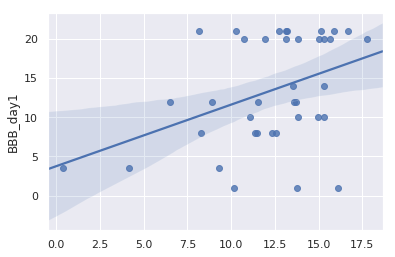

In [46]:
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as ss


ax = sns.regplot(x=y_pred, y=y_test)
print(ss.pearsonr(y_pred,y_test))